##Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

num_of_samples = 100

X, y = make_circles(num_of_samples,
                   noise = 0.02,
                   random_state = 42)

In [ ]:
X[:5],y[:5]

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_1.evaluate(X,y)

In [ ]:
# Adding hidden Layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_2.evaluate(X,y)

In [ ]:
# Change Optimizer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_3.evaluate(X,y)

In [ ]:
# Increase the number of hidden units
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_4.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_4.evaluate(X,y)

In [ ]:
#Add hidden layer and increase the number of hidden units
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_5.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_5.evaluate(X,y)

In [ ]:
import numpy as np

In [ ]:
#Visulize our model's predictions

def plot_decision_boundary(model, X, y):

  """
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()] # .c stack 2D arrays together
            
  y_pred = model.predict(x_in)
  y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())  

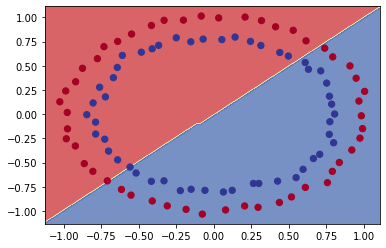

In [ ]:
plot_decision_boundary(model = model_5,
                       X=X, 
                       y=y)